# Practical 2(Logistic Regression And Gradient Descent)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

In [2]:
a  = pd.read_csv('Social_Network_Ads.csv')

In [3]:
a

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
#top 5 data..
a.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


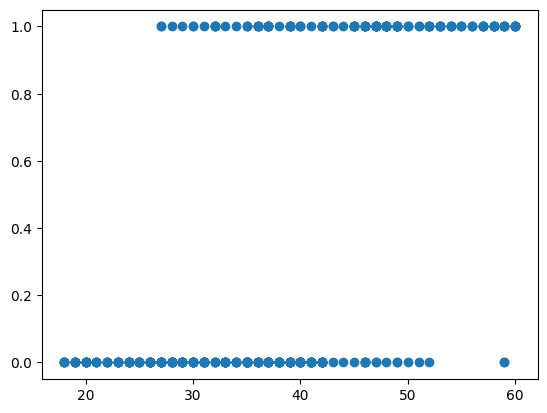

In [5]:
plt.scatter(a['Age'],a['Purchased'])
plt.show()

In [6]:
#Creating Logistic Regression Model...
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(a['Age'],a['Purchased'],test_size=0.20)


#Prediction_equation = 1 / 1+e^-b0-b1bxi

#Normalize the Value
def normalize(X):
    return X - X.mean()

# Predict the Value
def predict(X, b0, b1):
    X_array = np.array(X)
    return np.array([1 / (1 + exp(-1 * (b0 + b1 * x))) for x in X_array])

#Cost function of Logistic Regression
def logistic_regression(X,Y):
    b0 = 0
    b1 = 0
    learning_rate = 0.001
    iteration = 150
    for i in range(int(iteration)):
        y_pred = predict(X,b0,b1)
        Derivative_b0 = -2 * sum((Y-y_pred)*y_pred *(1-y_pred))
        Derivative_b1 = -2 * sum((Y-y_pred)*y_pred *(1-y_pred)*X)
        cost = sum((Y-y_pred)**2)
        b0 = b0 - learning_rate * Derivative_b0
        b1 = b1 - learning_rate*Derivative_b1
    return b0,b1


In [7]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(a['Age'],a['Purchased'],test_size=0.20)

In [8]:
#Apply Logistic Regression and Train Model
b0_value,b1_value = logistic_regression(X_train,Y_train)

In [9]:
# Normalize X_test value and Predict
x_test_norm = normalize(X_test)
y_prediction2 = predict(x_test_norm,b0_value,b1_value)



In [10]:
y_prediction2 = [1 if y>=0.5 else 0 for y in y_prediction2]

In [11]:
y_prediction2

[1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1]

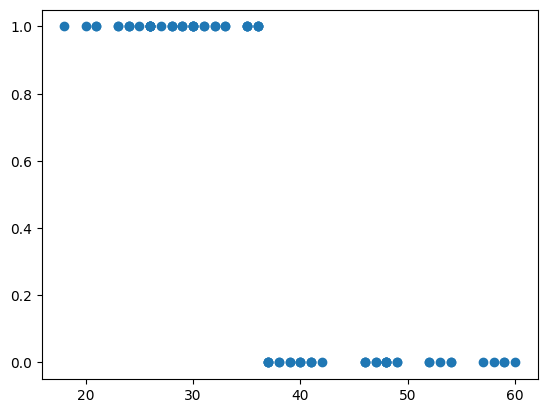

In [12]:
plt.scatter(X_test,y_prediction2)

In [13]:
from sklearn.metrics import accuracy_score,classification_report

score = accuracy_score(y_prediction2,Y_test)

In [14]:
print(classification_report(y_prediction2,Y_test))



              precision    recall  f1-score   support

           0       0.29      0.41      0.34        37
           1       0.24      0.16      0.19        43

    accuracy                           0.28        80
   macro avg       0.27      0.28      0.27        80
weighted avg       0.27      0.28      0.26        80



# By Ashish Vinod IT154